In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset
data = pd.read_csv('df_list_stock.csv')
data = data.set_index('ticker')
print(data.columns)

Index(['market', 'date_pulling', 'industry', 'sector', 'profitMargins',
       'priceToBook', 'debtToEquity', 'returnOnEquity', 'currentRatio',
       'trailingEps', 'avg_MF_ROC', 'avg_growth', 'beta', 'MF_EarningYield',
       'current_MF_ROC', 'FCF_Yield', 'PE_offset_Cash', 'PE', 'PEG',
       'PriceIndex_3m', 'percenFCFpersharetoprice'],
      dtype='object')


In [127]:
print(data.describe())
### Here, we can see there are some crazy ouliers. We might have to deal with it first ### 

       profitMargins  priceToBook  debtToEquity  returnOnEquity  currentRatio  \
count     540.000000   540.000000    540.000000      540.000000    540.000000   
mean        0.075703     1.435641     74.867894        0.047179      4.172235   
std         0.359238     3.572449     99.521726        0.305548     21.767403   
min        -1.445600     0.073937      0.010000       -4.969180      0.041000   
25%         0.006560     0.491709      9.609000        0.009332      0.980500   
50%         0.058710     0.796393     41.191500        0.063735      1.633500   
75%         0.133935     1.425695    104.796000        0.117653      3.049750   
max         6.532780    68.271770    868.585000        3.235090    434.210000   

       trailingEps  avg_MF_ROC  avg_growth        beta  MF_EarningYield  \
count   540.000000  540.000000  540.000000  540.000000       540.000000   
mean      0.818796    0.066253    0.066984    0.623562         0.045512   
std       3.181012    0.104397    5.583211   

In [128]:
data = data.loc[(data['PEG'] < 10) & (data['PEG'] > -10)]
data = data.loc[(data['PE'] < 70) & (data['PEG'] > -70)]
data = data.loc[(data['PE_offset_Cash'] < 70) & (data['PE_offset_Cash'] > -70)]
data = data.loc[(data['avg_growth'] < 10) & (data['avg_growth'] > -10)]
print(data.describe())

       profitMargins  priceToBook  debtToEquity  returnOnEquity  currentRatio  \
count     117.000000   117.000000    117.000000      117.000000    117.000000   
mean       -0.059638     0.693513    109.896248       -0.032749      2.195419   
std         0.271576     0.659487    139.743071        0.393260      4.015636   
min        -1.109650     0.073937      0.010000       -1.317370      0.183000   
25%        -0.096980     0.283064     19.192000       -0.129370      0.846000   
50%         0.004650     0.478322     65.405000        0.002590      1.238000   
75%         0.076550     0.802104    147.987000        0.077860      2.221000   
max         0.731220     3.531073    823.922000        3.235090     41.264000   

       trailingEps  avg_MF_ROC  avg_growth        beta  MF_EarningYield  \
count   117.000000  117.000000  117.000000  117.000000       117.000000   
mean      0.767009    0.020087    0.301380    0.597965         0.002224   
std       4.926466    0.110668    3.164658   

In [129]:
data_features = data.drop(columns=['market','date_pulling', 'industry', 'sector'])
print(data_features.head)

<bound method NDFrame.head of         profitMargins  priceToBook  debtToEquity  returnOnEquity  \
ticker                                                             
A.bk         -0.10720     1.808159       322.825        -0.08372   
AAV.bk        0.01645     3.175573       560.443         0.10318   
AFC.bk        0.03090     0.154088         5.714         0.01891   
AI.bk         0.02423     1.083650         0.036         0.07786   
AJ.bk        -0.02040     0.258338       145.043        -0.04209   
...               ...          ...           ...             ...   
UP.bk         0.07744     0.740299         0.234         0.08816   
UPF.bk        0.03944     0.647516         7.371         0.06407   
W.bk         -0.61024     2.542373       219.988        -1.31737   
WFX.bk       -0.04645     0.251446        28.476        -0.07698   
ZAA.bk       -0.37515     2.611465         2.512        -0.16366   

        currentRatio  trailingEps  avg_MF_ROC  avg_growth      beta  \
ticker        

In [130]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df[:3])

   profitMargins  priceToBook  debtToEquity  returnOnEquity  currentRatio  \
0      -0.175885     1.697441      1.530270       -0.130169     -0.037119   
1       0.281379     3.779809      3.237975        0.347134     -0.430773   
2       0.334815    -0.821464     -0.748734        0.131926      0.369039   

   trailingEps  avg_MF_ROC  avg_growth      beta  MF_EarningYield  \
0    -0.229750   -0.008959    1.176990 -0.638233        -0.071860   
1    -0.060548   -1.301222    0.753666  1.311555         0.292350   
2    -0.095204   -0.171399    0.491941  0.115508         0.236122   

   current_MF_ROC  FCF_Yield  PE_offset_Cash        PE       PEG  \
0        0.087169  -0.181816       -1.613369 -1.409817 -0.479518   
1        0.557114   0.113505        0.267430  0.147297  0.612066   
2        0.181761   0.182554        0.642261  0.908783  1.801890   

   PriceIndex_3m  percenFCFpersharetoprice  
0       1.238982                 -0.673876  
1      -0.438411                 -0.591751  
2     

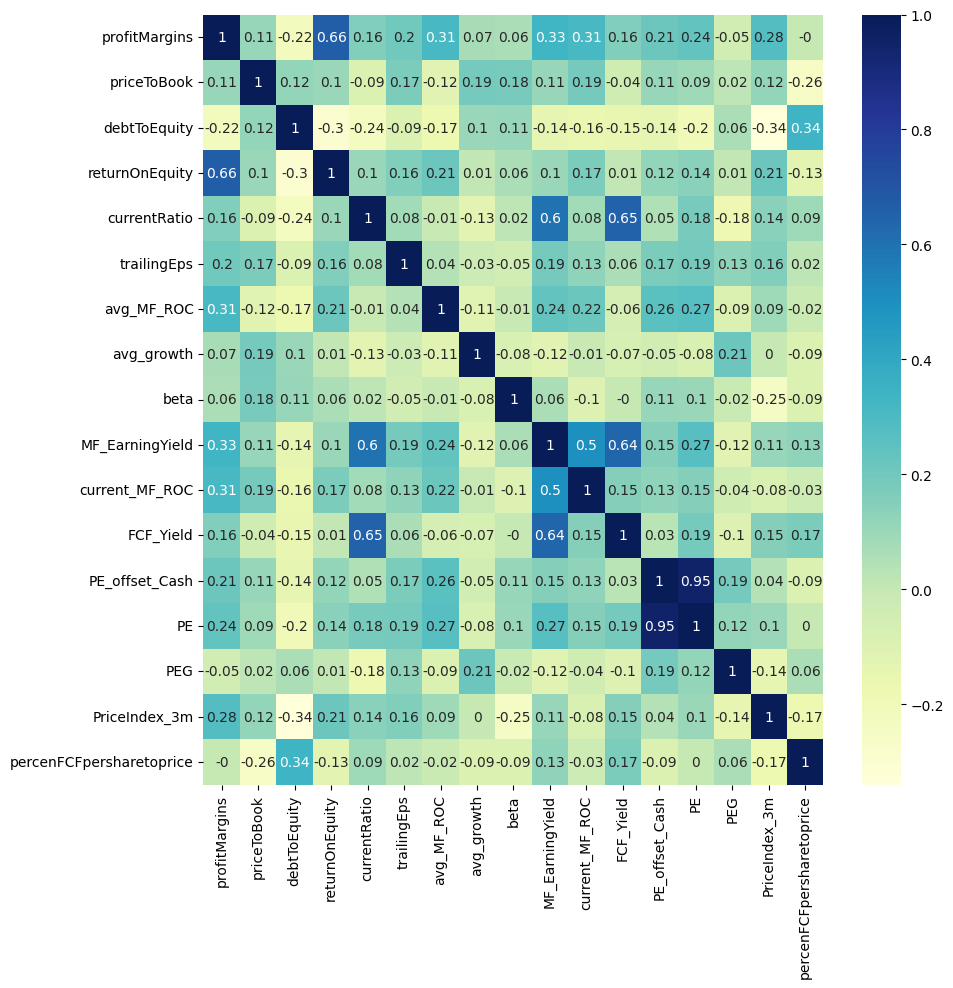

In [131]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

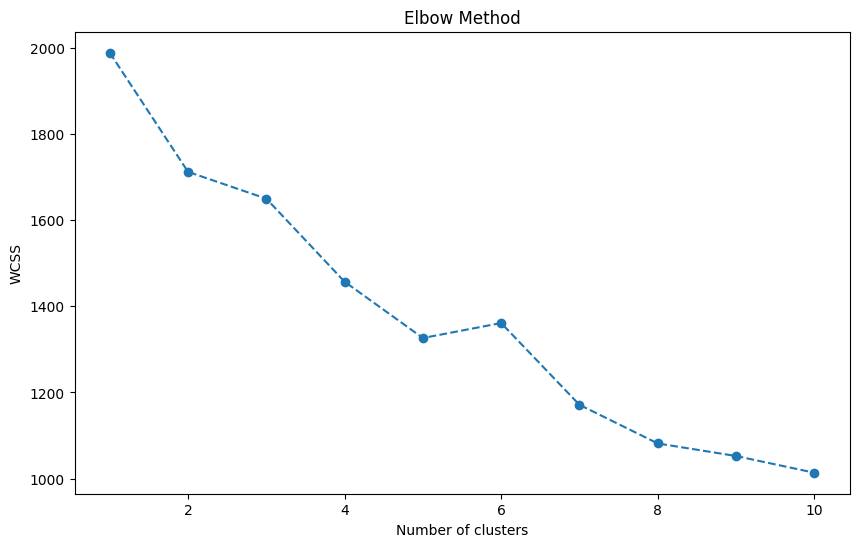

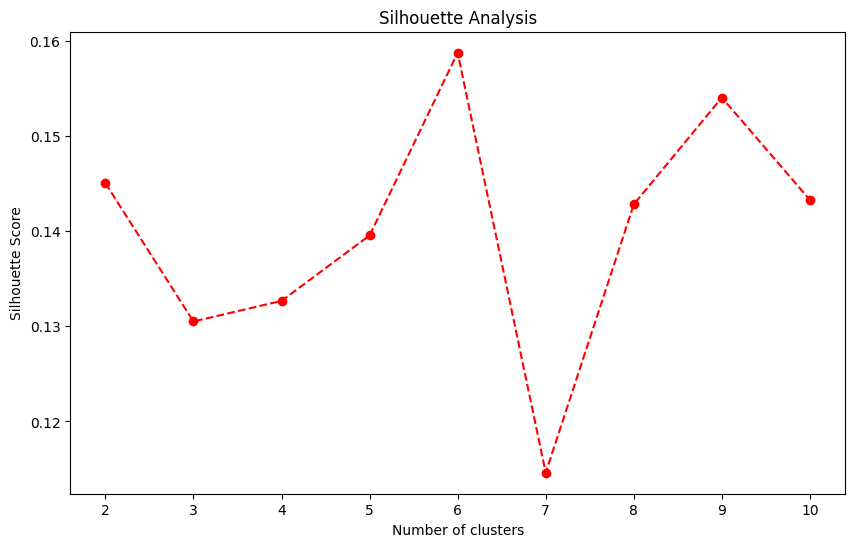

In [136]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

### Cluter no = 3 seems fine ###

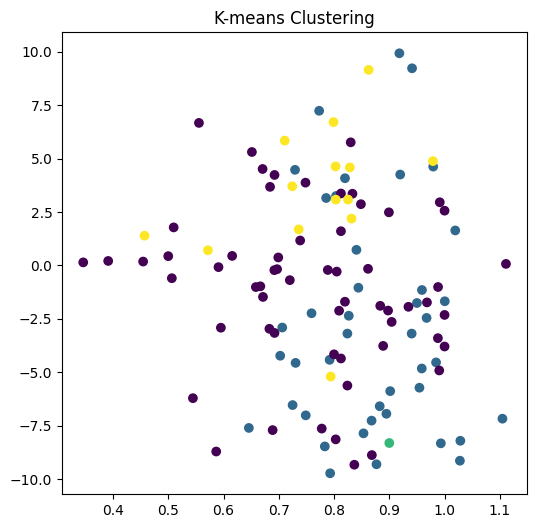

In [138]:
# K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax = plt.subplots(figsize=(6, 6))

# K-means plot
ax.scatter(data['PriceIndex_3m'], data['PEG'], c=kmeans_labels, cmap='viridis')
ax.set_title('K-means Clustering')

plt.show()

In [144]:
data['clusterno'] = kmeans_labels
print(data[:5])

       market date_pulling                      industry             sector  \
ticker                                                                        
A.bk      SET     2/3/2025     Real Estate - Development        Real Estate   
AAV.bk    SET     2/3/2025                      Airlines        Industrials   
AFC.bk    SET     2/3/2025         Textile Manufacturing  Consumer Cyclical   
AI.bk     SET     2/3/2025  Electrical Equipment & Parts        Industrials   
AJ.bk     SET     2/3/2025        Packaging & Containers  Consumer Cyclical   

        profitMargins  priceToBook  debtToEquity  returnOnEquity  \
ticker                                                             
A.bk         -0.10720     1.808159       322.825        -0.08372   
AAV.bk        0.01645     3.175573       560.443         0.10318   
AFC.bk        0.03090     0.154088         5.714         0.01891   
AI.bk         0.02423     1.083650         0.036         0.07786   
AJ.bk        -0.02040     0.258338    